<a href="https://www.kaggle.com/code/dalloliogm/predicting-using-a-logistic-regression-with-regula?scriptVersionId=228083482" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Rain prediction using Logistic Regression

This notebook predicts rainfall using a simple Logistic Regression model.

## Importing libraries and reading files

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
!head /kaggle/input/playground-series-s5e3/sample_submission.csv
!head /kaggle/input/playground-series-s5e3/train.csv
!head /kaggle/input/playground-series-s5e3/test.csv

id,rainfall
2190,0
2191,0
2192,0
2193,0
2194,0
2195,0
2196,0
2197,0
2198,0
id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
5,6,1022.7,20.6,18.6,16.5,12.5,79.0,81.0,0.0,20.0,15.7,1
6,7,1022.8,19.5,18.4,15.3,11.3,56.0,46.0,7.6,20.0,28.4,0
7,8,1019.7,15.8,13.6,12.7,11.8,96.0,100.0,0.0,50.0,52.8,1
8,9,1017.4,17.6,16.5,15.6,12.5,86.0,100.0,0.0,50.0,37.5,1
id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
2193,4,1022.9,20.6,17.3,15.2,

In [3]:
train = pd.read_csv("/kaggle/input/playground-series-s5e3/train.csv")#.set_index("id")
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


In [4]:
train.describe().style.background_gradient(cmap='summer')

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [5]:
train.day.max()

365

In [6]:
train.day.value_counts()

day
91     7
144    7
267    7
140    7
111    7
      ..
157    5
286    5
38     5
336    5
365    5
Name: count, Length: 365, dtype: int64

In [7]:
test = pd.read_csv("/kaggle/input/playground-series-s5e3/test.csv")#.set_index("id")
test.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
1,2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2,2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
3,2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
4,2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4


## Quick EDA

In [8]:
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#sns.pairplot(train, kind="kde")

## Handling Missing values

It seems there is just one missing value, in the test dataset

In [10]:
train.isnull().sum()


id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

In [11]:
test.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [12]:

test[test.isnull().any(axis=1)]


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
517,2707,153,1007.8,32.9,30.6,28.9,22.0,65.0,75.0,8.2,NaN,17.2


## Feature Engineering

### Adding season (spring, summer, fall, winter) and cyclical features

The day variables goes from 1 to 365, so we only have data from one year.

To tell our model that day 1 is close to day 365 (as they are both in winter) we add a cyclical feature

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

class SeasonMonthTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        # Nothing to fit for this transformer
        return self
    
    def transform(self, X):
        # Make a copy to avoid modifying the original
        X_trans = X.copy()
        
        # Convert day -> month
        def day_to_month(day):
            if day <= 31: return 1
            elif day <= 59: return 2
            elif day <= 90: return 3
            elif day <= 120: return 4
            elif day <= 151: return 5
            elif day <= 181: return 6
            elif day <= 212: return 7
            elif day <= 243: return 8
            elif day <= 273: return 9
            elif day <= 304: return 10
            elif day <= 334: return 11
            else: return 12
        
        X_trans['month'] = X_trans['day'].apply(day_to_month)
        
        # Convert day -> season
        def day_to_season(day):
            if 80 <= day < 172:
                return 'spring'
            elif 172 <= day < 264:
                return 'summer'
            elif 264 <= day < 356:
                return 'autumn'
            else:
                return 'winter'
        
        X_trans['season'] = X_trans['day'].apply(day_to_season)

        
        X_trans['day_sin'] = np.sin(2 * np.pi * X_trans['day'] / 365)
        X_trans['day_cos'] = np.cos(2 * np.pi * X_trans['day'] / 365)
        
        # One-hot encode season
        X_trans = pd.get_dummies(X_trans, columns=['season'], drop_first=True)
        
        return X_trans



### Additional features

Inspired by https://www.kaggle.com/code/josephnehrenz/87-9-logistic-s5e3-rainfall-probability-in-r

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class AdditionalFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_trans = X.copy()
        
        # ------------------- Sunshine Metrics -------------------
        X_trans['relative_sunshine'] = X_trans['sunshine'] / (100 - X_trans['cloud'] + 1)
        X_trans['sunshine_ratio'] = X_trans['sunshine'] / (X_trans['cloud'] + X_trans['humidity'] + 1e-5)
        X_trans['cloud_sun_ratio'] = X_trans['cloud'] / (X_trans['sunshine'] + 1)
        X_trans['sunshine_pct'] = X_trans['sunshine'] / 24.0  # Assuming max sunshine is 24 hours
        
        # ------------------- Cloud Metrics -------------------
        # Compute cloud gradient using shift (lag)
        X_trans['cloud_gradient'] = X_trans['cloud'] - X_trans['cloud'].shift(1, fill_value=X_trans['cloud'].iloc[0])
        # Categorize cloud values into bins: 0-20, 20-50, 50-80, 80-100
        X_trans['cloud_category'] = pd.cut(X_trans['cloud'], bins=[0,20,50,80,100],
                                           labels=[0,1,2,3], include_lowest=True).astype(float)
        X_trans['sky_opacity'] = X_trans['cloud'] / 100.0
        
        # ------------------- Temperature Metrics -------------------
        X_trans['temp_range'] = X_trans['maxtemp'] - X_trans['mintemp']
        X_trans['temp_change'] = X_trans['temparature'] - X_trans['temparature'].shift(1, 
                                               fill_value=X_trans['temparature'].iloc[0])
        # Exponential moving average with span 10
        X_trans['temp_ewm'] = X_trans['temparature'].ewm(span=10, adjust=False).mean()
        X_trans['temp_humidity_interaction'] = X_trans['temparature'] + 0.2 * X_trans['humidity']
        
        # ------------------- Pressure Metrics -------------------
        # Rolling mean and std (window includes current and 6 previous values => window=7)
        X_trans['pressure_rolling_mean'] = X_trans['pressure'].rolling(window=7, min_periods=1).mean()
        X_trans['pressure_rolling_std'] = X_trans['pressure'].rolling(window=7, min_periods=1).std()
        X_trans['pressure_diff'] = X_trans['pressure'] - X_trans['pressure'].shift(1, 
                                              fill_value=X_trans['pressure'].iloc[0])
        
        # ------------------- Humidity Metrics -------------------
        X_trans['dewpoint_depression'] = X_trans['temparature'] - X_trans['dewpoint']
        X_trans['rh_approx'] = 100 - (5 * X_trans['dewpoint_depression'])
        X_trans['humidity_cloud_interaction'] = (X_trans['humidity'] * X_trans['cloud']) / 10000.0
        X_trans['inv_humidity_cloud'] = 100 - X_trans['humidity'] - X_trans['cloud']
        
        # ------------------- Dewpoint Metrics -------------------
        X_trans['svp'] = 6.1078 * np.exp((17.27 * X_trans['temparature']) / (X_trans['temparature'] + 237.3))
        X_trans['abs_humidity'] = (6.112 * np.exp((17.67 * X_trans['temparature']) / (X_trans['temparature'] + 243.5)) * 
                                   X_trans['humidity'] * 2.1674) / (273.15 + X_trans['temparature'])
        
        return X_trans


### Lagging features

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class LagFeatureTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None, n_lags=5):
        """
        Parameters:
            columns: list of column names to create lag features for.
                     If None, defaults to ['humidity', 'temparature', 'pressure', 'sunshine'].
            n_lags: number of previous days (lags) to include.
        """
        self.columns = columns if columns is not None else ['humidity', 'temparature', 'pressure', 'sunshine']
        self.n_lags = n_lags
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Create a copy so we don't modify the original DataFrame
        X_trans = X.copy()
        for col in self.columns:
            for lag in range(1, self.n_lags + 1):
                # Create a new column for each lag value
                X_trans[f"{col}_lag_{lag}"] = X_trans[col].shift(lag)
        return X_trans


## Predicting Clusters

Thanks to this notebook: https://www.kaggle.com/code/felixleung/looks-like-there-are-3-clusters


In [16]:
train.columns

Index(['id', 'day', 'pressure', 'maxtemp', 'temparature', 'mintemp',
       'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection',
       'windspeed', 'rainfall'],
      dtype='object')

In [17]:
from sklearn.cluster import KMeans
import pandas as pd

# Suppose you use the 'day' column (or any set of features) for clustering
kmeans = KMeans(n_clusters=6, random_state=42)

# Fit on training data
train['cluster'] = kmeans.fit_predict(train[['day', 'temparature', 'sunshine', 'cloud', 'windspeed']])
# Predict clusters for test data using the same model
test['cluster'] = kmeans.predict(test[['day', 'temparature', 'sunshine', 'cloud', 'windspeed']])

# One-hot encode the cluster labels (optional but recommended)
train = pd.get_dummies(train, columns=['cluster'], prefix='cluster')
test = pd.get_dummies(test, columns=['cluster'], prefix='cluster')


In [18]:
train.head()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1,False,False,False,False,True,False
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1,False,False,False,False,True,False
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1,False,False,False,False,True,False
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1,False,False,False,False,True,False
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0,False,False,False,False,True,False


## Prediction using Logistic Regression

In [19]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define feature columns
features = ['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 
            'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed', 'cluster_0', 'cluster_1', 'cluster_2']

X = train[features]
y = train['rainfall']

pipeline = Pipeline(steps=[
    ('feature_eng', SeasonMonthTransformer()),
    ('additional_fe', AdditionalFeatureTransformer()),
    ('lag_features', LagFeatureTransformer(
        columns=['humidity', 'temparature', 'pressure', 
                 'cloud', 'windspeed', 'dewpoint', 'sunshine',
                 #'cluster_0', 'cluster_1', 'cluster_2'
                ],
        n_lags=6
    )),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(
        penalty='l1',         # L1 (Lasso) regularization
        C=1.0,                # adjust for stronger/weaker regularization
        max_iter=1000,
        random_state=42,
        solver='liblinear'    # supports L1 penalty
    ))
])

# For evaluation, using repeated stratified 5-fold CV:
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=666)
cv_scores = cross_val_score(pipeline, X, y, cv=rskf, scoring=auc_scorer)
print("Repeated CV AUC scores:", cv_scores)
print("Mean AUC:", np.mean(cv_scores))


Repeated CV AUC scores: [0.90395623 0.85838945 0.89915825 0.87241863 0.88627946 0.91262626
 0.88414703 0.90805275 0.85636925 0.86186869 0.87407407 0.86153199
 0.88352974 0.90294613 0.87982604 0.89997194 0.84607183 0.88122896
 0.90496633 0.88560606 0.86153199 0.87999439 0.90656566 0.8797138
 0.88445567 0.85827722 0.87831089 0.89551066 0.91899551 0.86756453
 0.86388889 0.88804714 0.89694164 0.86961279 0.8832211  0.84870932
 0.86961279 0.90016835 0.90294613 0.92643098 0.91930415 0.9236532
 0.81938833 0.86551627 0.90014029 0.8701459  0.90095398 0.87542088
 0.87314815 0.89884961]
Mean AUC: 0.883800785634119


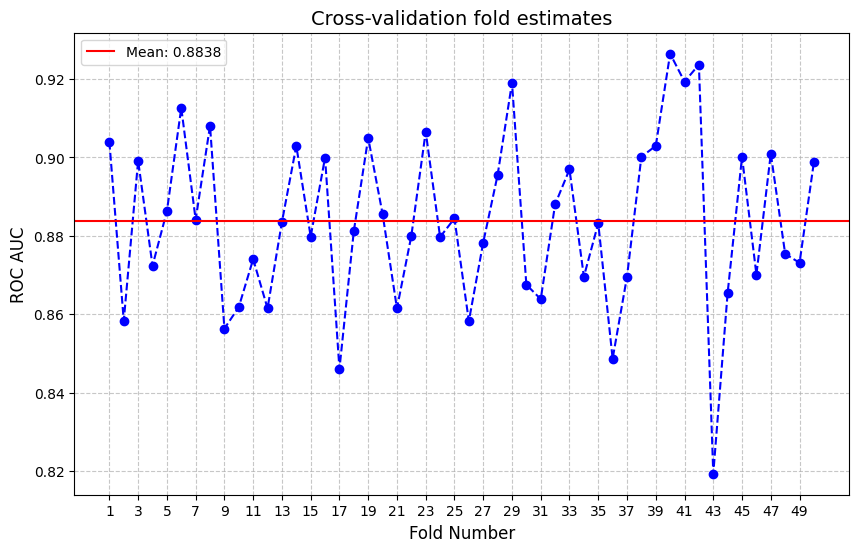

In [20]:
# Code inspired by https://www.kaggle.com/code/nikita7364777/lb-0-863-stacking-v2
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), cv_scores, marker='o', linestyle='--', color='b')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='-', 
            label=f'Mean: {cv_scores.mean():.4f}')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('ROC AUC', fontsize=12)
plt.title('Cross-validation fold estimates', fontsize=14)
plt.xticks(range(1, 50, 2))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Fitting model

In [21]:
# Refit on the full training set to ensure coefficients are available
pipeline.fit(X, y)


Pipeline(steps=[('feature_eng', SeasonMonthTransformer()),
                ('additional_fe', AdditionalFeatureTransformer()),
                ('lag_features',
                 LagFeatureTransformer(columns=['humidity', 'temparature',
                                                'pressure', 'cloud',
                                                'windspeed', 'dewpoint',
                                                'sunshine'],
                                       n_lags=6)),
                ('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

## Visualizing Feature Importance

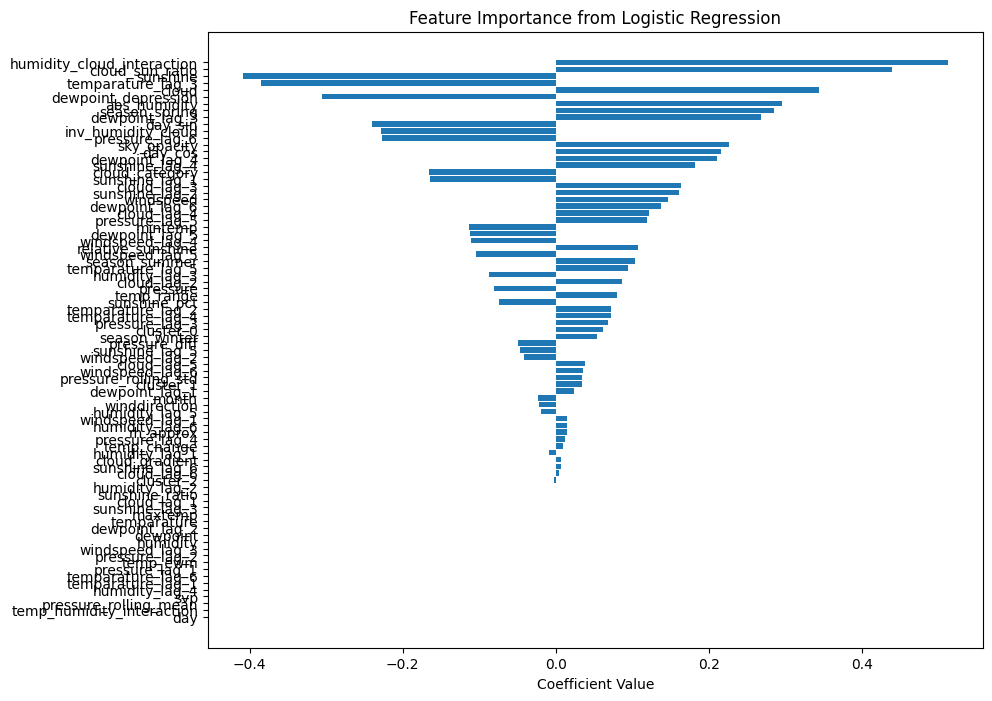

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Manually apply the feature engineering steps (skipping the imputer) to get the final feature names
X_season = pipeline.named_steps['feature_eng'].transform(X)
X_transformed = pipeline.named_steps['additional_fe'].transform(X_season)
X_transformed = pipeline.named_steps['lag_features'].transform(X_transformed)

feature_names = X_transformed.columns

# Extract coefficients from the logistic regression classifier
coefficients = pipeline.named_steps['clf'].coef_[0]

# Create a DataFrame to hold feature names and coefficients
feat_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
})
feat_importance['abs_coefficient'] = feat_importance['coefficient'].abs()
feat_importance = feat_importance.sort_values('abs_coefficient', ascending=True)

# Plot feature importance as a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(feat_importance['feature'], feat_importance['coefficient'])
plt.xlabel("Coefficient Value")
plt.title("Feature Importance from Logistic Regression")
plt.show()


## Trying XGBoost and LightGBM

In [23]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline_xgb = Pipeline(steps=[
    ('feature_eng', SeasonMonthTransformer()),
    ('additional_fe', AdditionalFeatureTransformer()),
    ('lag_features', LagFeatureTransformer(columns=['humidity', 'temparature', 'pressure', 'sunshine'], n_lags=5)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),  # You might not need scaling for tree-based models, but it's here for consistency.
    ('clf', XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        use_label_encoder=False,    # Disable label encoder to avoid warnings
        eval_metric='auc'           # Set evaluation metric to AUC
    ))
])


In [24]:
from lightgbm import LGBMClassifier

pipeline_lgb = Pipeline(steps=[
    ('feature_eng', SeasonMonthTransformer()),
    ('additional_fe', AdditionalFeatureTransformer()),
    ('lag_features', LagFeatureTransformer(columns=['humidity', 'temparature', 'pressure', 'sunshine'], n_lags=5)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        verbose=-1  # This will suppress the warnings
    ))
])


In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
import numpy as np

auc_scorer = make_scorer(roc_auc_score, needs_proba=True)
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Evaluate XGBoost pipeline
cv_scores_xgb = cross_val_score(pipeline_xgb, X, y, cv=rskf, scoring=auc_scorer)
print("XGBoost Repeated CV AUC:", np.mean(cv_scores_xgb), cv_scores_xgb)

# Evaluate LightGBM pipeline
cv_scores_lgb = cross_val_score(pipeline_lgb, X, y, cv=rskf, scoring=auc_scorer)
print("LightGBM Repeated CV AUC:", np.mean(cv_scores_lgb), cv_scores_lgb)


XGBoost Repeated CV AUC: 0.8821835016835016 [0.91063412 0.85328283 0.86961279 0.89023569 0.88779461 0.90608866
 0.88291246 0.89006734 0.8924523  0.8565376  0.9280303  0.87960157
 0.89295735 0.84461279 0.86843434 0.86411336 0.86992144 0.867789
 0.91217733 0.88150954 0.88630752 0.85718294 0.87643098 0.89640853
 0.89643659 0.8879349  0.89029181 0.8619248  0.85622896 0.9020202
 0.90246914 0.88745791 0.88956229 0.83246352 0.88049944 0.86063412
 0.88695286 0.89214366 0.88369809 0.89890572 0.8575477  0.9041807
 0.87696409 0.8760101  0.90339506 0.87965769 0.89472503 0.86585297
 0.88698092 0.88914141]
LightGBM Repeated CV AUC: 0.8814377104377104 [0.91632997 0.85028058 0.86955668 0.89062851 0.87979798 0.9047138
 0.88546577 0.89579125 0.8914422  0.85230079 0.92210999 0.88271605
 0.8986532  0.84304153 0.86517957 0.86299102 0.86503928 0.8706229
 0.91484287 0.87174523 0.88585859 0.86251403 0.8708193  0.89500561
 0.89068462 0.88796296 0.88305275 0.86021324 0.84870932 0.90086981
 0.89983165 0.88512907

## Creating Submission file

In [26]:
X_test = test[features]
X_test

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,cluster_0,cluster_1,cluster_2
0,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3,False,False,False
1,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3,False,False,False
2,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9,False,False,False
3,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6,False,False,False
4,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3,False,False,False
726,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2,False,False,False
727,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9,False,False,False
728,364,1014.4,21.0,20.0,19.7,19.8,94.0,93.0,0.0,50.0,39.5,False,False,False


In [27]:
pipeline_xgb.fit(X,y)
# Predict probabilities on the test set
test_preds = pipeline_xgb.predict_proba(X_test)[:, 1]

# Create the submission DataFrame
submission = pd.DataFrame({
    'id': test['id'],
    'rainfall': test_preds
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [28]:
test_preds[0:10]

array([0.9926035 , 0.99509674, 0.9748692 , 0.08534203, 0.0343996 ,
       0.9532544 , 0.96000135, 0.9679321 , 0.98564106, 0.8884176 ],
      dtype=float32)

In [29]:
submission.head()

,id,rainfall
0,2190,0.992603
1,2191,0.995097
2,2192,0.974869
3,2193,0.085342
4,2194,0.034400
